# Data Literacy Project

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
#import geoplot as gdp

<hr style="border:1px solid gray">

# Import Data
The data is downloaded from [bahn-analysen.de](https://www.bahn-analysen.de)

We collected the data to all long-distance trains in Germany from the year 20th January 2021 until 4th December 2023 traveling to Frankfurt Hbf and departing from Frankfurt Hbf.

In [2]:
data_in = pd.read_csv("data/scraped_incoming_Frankfurt_Hbf.csv",
                         names=['origin', 'destination', 'date', 'departure', 'arrival', 'train', 'delay', 'cancellation']) 
data_out = pd.read_csv("data/scraped_outgoing_Frankfurt_Hbf.csv",
                         names=['origin', 'destination', 'date', 'departure', 'arrival', 'train', 'delay', 'cancellation']) 

In [8]:
data_in

,origin,destination,date,departure,arrival,train,delay,cancellation
0,Aachen Hbf,Frankfurt(Main)Hbf,20.01.2021,07:39,09:31,ICE 11,0,NaN
1,Aachen Hbf,Frankfurt(Main)Hbf,20.01.2021,11:39,13:31,ICE 15,2,NaN
2,Aachen Hbf,Frankfurt(Main)Hbf,20.01.2021,15:39,17:33,ICE 17,5,NaN
3,Aachen Hbf,Frankfurt(Main)Hbf,20.01.2021,19:39,21:31,ICE 19,3,NaN
4,Aachen Hbf,Frankfurt(Main)Hbf,22.01.2021,07:39,09:31,ICE 11,0,NaN
...,...,...,...,...,...,...,...,...
1023685,Züssow,Frankfurt(Main)Hbf,24.07.2021,07:46,15:00,ICE 1141,7,NaN
1023686,Züssow,Frankfurt(Main)Hbf,31.07.2021,07:46,15:00,ICE 1141,8,NaN
1023687,Züssow,Frankfurt(Main)Hbf,07.08.2021,07:31,15:01,ICE 1141,0,NaN
1023688,Züssow,Frankfurt(Main)Hbf,14.08.2021,07:31,15:01,ICE 1141,7,NaN


In [4]:
data_out

,origin,destination,date,departure,arrival,train,delay,cancellation
0,Frankfurt(Main)Hbf,Aachen Hbf,20.01.2021,06:29,08:16,ICE 18,0,NaN
1,Frankfurt(Main)Hbf,Aachen Hbf,20.01.2021,10:27,12:16,ICE 16,0,NaN
2,Frankfurt(Main)Hbf,Aachen Hbf,20.01.2021,14:27,16:16,ICE 14,0,NaN
3,Frankfurt(Main)Hbf,Aachen Hbf,20.01.2021,18:29,20:16,ICE 10,0,NaN
4,Frankfurt(Main)Hbf,Aachen Hbf,21.01.2021,06:29,08:16,ICE 18,0,NaN
...,...,...,...,...,...,...,...,...
1042300,Frankfurt(Main)Hbf,Züssow,17.07.2021,15:33,22:16,ICE 1142,0,Ausfall (Startbahnhof)
1042301,Frankfurt(Main)Hbf,Züssow,24.07.2021,15:33,22:16,ICE 1142,0,NaN
1042302,Frankfurt(Main)Hbf,Züssow,31.07.2021,15:33,22:16,ICE 1142,0,NaN
1042303,Frankfurt(Main)Hbf,Züssow,07.08.2021,15:33,22:16,ICE 1142,0,NaN


<hr style="border:1px solid gray">

# Data preprocessing

- `origin`: str
- `destination`: str
- `date`: datetime date
- `departure`: datetime time
- `arrival`: datetime time
- `train`: str
- `delay`: int
- `cancellation`: float or str `[nan, 'Ausfall (Startbahnhof)', 'Ausfall (Zielbahnhof)']` 

In [9]:
# Format date and time properly
data_in['date'] = data_in['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y').date())
data_in['departure'] = data_in['departure'].apply(lambda x: datetime.strptime(x, '%H:%M').time())
data_in['arrival'] = data_in['arrival'].apply(lambda x: datetime.strptime(x, '%H:%M').time())

data_out['date'] = data_out['date'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y').date())
data_out['departure'] = data_out['departure'].apply(lambda x: datetime.strptime(x, '%H:%M').time())
data_out['arrival'] = data_out['arrival'].apply(lambda x: datetime.strptime(x, '%H:%M').time())

In [19]:
display(list(set(data_in.cancellation))) # data in 
display(list(set(data_out.cancellation))) # data out - describe Startbahnhof vs Zielbahnhof ?

[nan, 'Ausfall (Startbahnhof)', 'Ausfall (Zielbahnhof)']

[nan, 'Ausfall (Startbahnhof)', 'Ausfall (Zielbahnhof)']

### 1. Sort

after: 1. date, 2. arrival, 3. train, 4. departure

do we need to differ here between incoming and outgoing?

In [21]:
data_in = data_in.sort_values(['date', 'arrival', 'train', 'departure'], ascending=[True, True, True, True], ignore_index=True)
data_out = data_out.sort_values(['date', 'departure', 'train', 'arrival'], ascending=[True, True, True, True], ignore_index=True)

### 2. Aggregate Data
Aggregate the data such that each train ride is contained only once in the dataset

add different versions for incoming or outgoing !!!!!


Groupby method using group_keys also possible: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

#### 1. groupby and agg() to list

In [31]:
# Define a custom aggregation function to collect the values in to a list
def list_agg(x):
    return list(x)

# Use groupby with agg to apply custom aggregation function
result_in = data_in.groupby(['train', 'date', 'arrival', 'destination'])[['origin', 'departure', 'delay', 'cancellation']].agg(list_agg).reset_index()
result_out = data_out.groupby(['train', 'date', 'departure', 'origin'])[['destination', 'arrival', 'delay', 'cancellation']].agg(list_agg).reset_index()



In [32]:
result_in

,train,date,arrival,destination,origin,departure,delay,cancellation
0,EC 112,2021-01-20,19:40:00,Frankfurt(Main)Hbf,"[München Hbf, Ulm Hbf]","[15:47:00, 17:03:00]","[5, 5]","[nan, nan]"
1,EC 112,2021-01-21,19:40:00,Frankfurt(Main)Hbf,"[München Hbf, Augsburg Hbf, Stuttgart Hbf, Hei...","[15:47:00, 16:17:00, 18:04:00, 18:46:00, 19:00...","[31, 31, 31, 31, 31]","[nan, nan, nan, nan, nan]"
2,EC 112,2021-01-22,19:40:00,Frankfurt(Main)Hbf,"[Freilassing, Traunstein, Rosenheim, München O...","[14:08:00, 14:25:00, 15:03:00, 15:33:00, 15:47...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,EC 112,2021-01-23,19:40:00,Frankfurt(Main)Hbf,"[Freilassing, Traunstein, Rosenheim, München O...","[14:08:00, 14:25:00, 15:03:00, 15:33:00, 15:47...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,EC 112,2021-01-24,19:40:00,Frankfurt(Main)Hbf,"[Freilassing, Traunstein, Rosenheim, München O...","[14:08:00, 14:25:00, 15:03:00, 15:33:00, 15:47...","[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...
169709,TGV 9599,2023-08-05,23:56:00,Frankfurt(Main)Hbf,"[Karlsruhe Hbf, Mannheim Hbf]","[22:20:00, 23:02:00]","[0, 0]","[nan, nan]"
169710,TGV 9599,2023-08-12,00:00:00,Frankfurt(Main)Hbf,"[Karlsruhe Hbf, Mannheim Hbf]","[22:20:00, 23:02:00]","[0, 0]","[nan, nan]"
169711,TGV 9599,2023-08-19,00:00:00,Frankfurt(Main)Hbf,"[Karlsruhe Hbf, Mannheim Hbf]","[22:20:00, 23:02:00]","[0, 0]","[nan, nan]"
169712,TGV 9599,2023-08-26,23:56:00,Frankfurt(Main)Hbf,"[Karlsruhe Hbf, Mannheim Hbf]","[22:20:00, 23:02:00]","[0, 0]","[nan, nan]"


In [33]:
result_out

,train,date,departure,origin,destination,arrival,delay,cancellation
0,EC 113,2021-01-20,08:20:00,Frankfurt(Main)Hbf,"[Darmstadt Hbf, Ulm Hbf, Augsburg Hbf, München...","[08:36:00, 10:54:00, 11:40:00, 12:10:00, 12:25...","[0, 0, 0, 5, 0, 0]","[nan, nan, nan, nan, nan, nan]"
1,EC 113,2021-01-21,08:20:00,Frankfurt(Main)Hbf,"[Darmstadt Hbf, Bensheim, Weinheim(Bergstr)Hbf...","[08:36:00, 08:48:00, 08:58:00, 09:11:00, 09:52...","[0, 0, 0, 0, 4, 4, 0, 0, 23, 0, 0, 0, 0]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,EC 113,2021-01-22,08:20:00,Frankfurt(Main)Hbf,"[Darmstadt Hbf, Bensheim, Weinheim(Bergstr)Hbf...","[08:36:00, 08:48:00, 08:58:00, 09:09:00, 09:11...","[3, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,EC 113,2021-01-23,08:20:00,Frankfurt(Main)Hbf,"[Ulm Hbf, Augsburg Hbf, München Hbf, Rosenheim...","[10:54:00, 11:40:00, 12:10:00, 12:55:00, 13:32...","[0, 0, 0, 0, 0, 0]","[nan, nan, nan, nan, nan, nan]"
4,EC 113,2021-01-24,08:20:00,Frankfurt(Main)Hbf,"[Heidelberg Hbf, Stuttgart Hbf, Ulm Hbf, Günzb...","[09:09:00, 09:52:00, 10:54:00, 11:08:00, 11:40...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...,...,...,...
188887,TGV69056,2021-02-10,08:56:00,Frankfurt(Main)Hbf,"[Mannheim Hbf, Kaiserslautern Hbf, Saarbrücken...","[09:39:00, 10:21:00, 11:00:00]","[1, 0, 0]","[nan, nan, nan]"
188888,TGV69056,2021-02-11,08:56:00,Frankfurt(Main)Hbf,"[Mannheim Hbf, Kaiserslautern Hbf, Saarbrücken...","[09:39:00, 10:21:00, 11:00:00]","[1, 0, 1]","[nan, nan, nan]"
188889,TGV69058,2021-02-10,05:56:00,Frankfurt(Main)Hbf,"[Mannheim Hbf, Kaiserslautern Hbf, Saarbrücken...","[06:38:00, 07:21:00, 07:59:00]","[0, 5, 0]","[nan, nan, nan]"
188890,TGV69068,2022-01-20,06:56:00,Frankfurt(Main)Hbf,"[Mannheim Hbf, Karlsruhe Hbf]","[07:36:00, 08:05:00]","[0, 0]","[nan, nan]"


#### groupby using keys
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [34]:
result_in_keys = data_in.groupby(['train', 'date', 'destination', 'arrival'], group_keys=True).apply(lambda x:x)

In [35]:
result_in_keys

origin  \
train    date       destination        arrival                          
EC  112  2021-01-20 Frankfurt(Main)Hbf 19:40:00 246       München Hbf   
                                                247           Ulm Hbf   
         2021-01-21 Frankfurt(Main)Hbf 19:40:00 724       München Hbf   
                                                725      Augsburg Hbf   
                                                726     Stuttgart Hbf   
...                                                               ...   
TGV 9599 2023-08-19 Frankfurt(Main)Hbf 00:00:00 907520   Mannheim Hbf   
         2023-08-26 Frankfurt(Main)Hbf 23:56:00 915934  Karlsruhe Hbf   
                                                915935   Mannheim Hbf   
TGV69063 2021-02-09 Frankfurt(Main)Hbf 18:58:00 24336   Karlsruhe Hbf   
                                                24337    Mannheim Hbf   

                                                               destination  \
train    date       destination        arrival                               
EC  112  2021-01-20 Frankfurt(Main)Hbf 19:40:00 246     Frankfurt(Main)Hbf   
                                                247     Frankfurt(Main)Hbf   
         2021-01-21 Frankfurt(Main)Hbf 19:40:00 724     Frankfurt(Main)Hbf   
                                                725     Frankfurt(Main)Hbf   
                                                726     Frankfurt(Main)Hbf   
...                                                                    ...   
TGV 9599 2023-08-19 Frankfurt(Main)Hbf 00:00:00 907520  Frankfurt(Main)Hbf   
         2023-08-26 Frankfurt(Main)Hbf 23:56:00 915934  Frankfurt(Main)Hbf   
                                                915935  Frankfurt(Main)Hbf   
TGV69063 2021-02-09 Frankfurt(Main)Hbf 18:58:00 24336   Frankfurt(Main)Hbf   
                                                24337   Frankfurt(Main)Hbf   

                                                              date departure  \
train    date       destination        arrival                                 
EC  112  2021-01-20 Frankfurt(Main)Hbf 19:40:00 246     2021-01-20  15:47:00   
                                                247     2021-01-20  17:03:00   
         2021-01-21 Frankfurt(Main)Hbf 19:40:00 724     2021-01-21  15:47:00   
                                                725     2021-01-21  16:17:00   
                                                726     2021-01-21  18:04:00   
...                                                            ...       ...   
TGV 9599 2023-08-19 Frankfurt(Main)Hbf 00:00:00 907520  2023-08-19  23:02:00   
         2023-08-26 Frankfurt(Main)Hbf 23:56:00 915934  2023-08-26  22:20:00   
                                                915935  2023-08-26  23:02:00   
TGV69063 2021-02-09 Frankfurt(Main)Hbf 18:58:00 24336   2021-02-09  17:55:00   
                                                24337   2021-02-09  18:21:00   

                                                         arrival     train  \
train    date       destination        arrival                               
EC  112  2021-01-20 Frankfurt(Main)Hbf 19:40:00 246     19:40:00   EC  112   
                                                247     19:40:00   EC  112   
         2021-01-21 Frankfurt(Main)Hbf 19:40:00 724     19:40:00   EC  112   
                                                725     19:40:00   EC  112   
                                                726     19:40:00   EC  112   
...                                                          ...       ...   
TGV 9599 2023-08-19 Frankfurt(Main)Hbf 00:00:00 907520  00:00:00  TGV 9599   
         2023-08-26 Frankfurt(Main)Hbf 23:56:00 915934  23:56:00  TGV 9599   
                                                915935  23:56:00  TGV 9599   
TGV69063 2021-02-09 Frankfurt(Main)Hbf 18:58:00 24336   18:58:00  TGV69063   
                                                24337   18:58:00  TGV69063   

                                          

In [36]:
result_out_keys = data_out.groupby(['train', 'date', 'origin', 'departure'], group_keys=True).apply(lambda x:x)

In [37]:
result_out_keys

origin  \
train    date       origin             departure                              
EC  113  2021-01-20 Frankfurt(Main)Hbf 08:20:00  152     Frankfurt(Main)Hbf   
                                                 153     Frankfurt(Main)Hbf   
                                                 154     Frankfurt(Main)Hbf   
                                                 155     Frankfurt(Main)Hbf   
                                                 156     Frankfurt(Main)Hbf   
...                                                                     ...   
TGV69068 2022-01-20 Frankfurt(Main)Hbf 06:56:00  369173  Frankfurt(Main)Hbf   
                                                 369174  Frankfurt(Main)Hbf   
TGV69086 2021-12-11 Frankfurt(Main)Hbf 06:56:00  323145  Frankfurt(Main)Hbf   
                                                 323146  Frankfurt(Main)Hbf   
                                                 323147  Frankfurt(Main)Hbf   

                                                                destination  \
train    date       origin             departure                              
EC  113  2021-01-20 Frankfurt(Main)Hbf 08:20:00  152          Darmstadt Hbf   
                                                 153                Ulm Hbf   
                                                 154           Augsburg Hbf   
                                                 155            München Hbf   
                                                 156            München Ost   
...                                                                     ...   
TGV69068 2022-01-20 Frankfurt(Main)Hbf 06:56:00  369173        Mannheim Hbf   
                                                 369174       Karlsruhe Hbf   
TGV69086 2021-12-11 Frankfurt(Main)Hbf 06:56:00  323145        Mannheim Hbf   
                                                 323146  Kaiserslautern Hbf   
                                                 323147     Saarbrücken Hbf   

                                                               date departure  \
train    date       origin             departure                                
EC  113  2021-01-20 Frankfurt(Main)Hbf 08:20:00  152     2021-01-20  08:20:00   
                                                 153     2021-01-20  08:20:00   
                                                 154     2021-01-20  08:20:00   
                                                 155     2021-01-20  08:20:00   
                                                 156     2021-01-20  08:20:00   
...                                                             ...       ...   
TGV69068 2022-01-20 Frankfurt(Main)Hbf 06:56:00  369173  2022-01-20  06:56:00   
                                                 369174  2022-01-20  06:56:00   
TGV69086 2021-12-11 Frankfurt(Main)Hbf 06:56:00  323145  2021-12-11  06:56:00   
                                                 323146  2021-12-11  06:56:00   
                                                 323147  2021-12-11  06:56:00   

                                                          arrival     train  \
train    date       origin             departure                              
EC  113  2021-01-20 Frankfurt(Main)Hbf 08:20:00  152     08:36:00   EC  113   
                                                 153     10:54:00   EC  113   
                                                 154     11:40:00   EC  113   
                                                 155     12:10:00   EC  113   
                                                 156     12:25:00   EC  113   
...                                                           ...       ...   
TGV69068 2022-01-20 Frankfurt(Main)Hbf 06:56:00  369173  07:36:00  TGV69068   
                                                 369174  08:05:00  TGV69068   
TGV69086 2021-12-11 Frankfurt(Main)Hbf 06:56:00  323145  07:38:00  TGV69086   
                                                 323146  08:22:00  TGV69086   
           

___
#### 3. Sort data

In [38]:
sorted_in = result_in.sort_values(['date', 'arrival', 'train'], ascending=[True, True, True], ignore_index=True)
sorted_out = result_out.sort_values(['date', 'departure', 'train'], ascending=[True, True, True], ignore_index=True)

In [39]:
sorted_in

,train,date,arrival,destination,origin,departure,delay,cancellation
0,ICE 520,2021-01-20,00:03:00,Frankfurt(Main)Hbf,"[München Hbf, Aschaffenburg Hbf]","[20:54:00, 23:35:00]","[4, 4]","[nan, nan]"
1,IC 2027,2021-01-20,00:13:00,Frankfurt(Main)Hbf,"[Hamburg Hbf, Münster(Westf)Hbf, Wuppertal Hbf...","[17:46:00, 20:03:00, 21:15:00, 21:28:00]","[3, 3, 3, 3]","[nan, nan, nan, nan]"
2,ICE 990,2021-01-20,00:41:00,Frankfurt(Main)Hbf,"[München Hbf, Ulm Hbf, Mannheim Hbf]","[20:44:00, 22:03:00, 23:51:00]","[0, 0, 0]","[nan, nan, nan]"
3,ICE 699,2021-01-20,02:15:00,Frankfurt(Main)Hbf,"[Hamburg Hbf, Berlin-Spandau, Berlin Hbf, Berl...","[19:36:00, 21:12:00, 21:28:00, 21:35:00]","[0, 0, 0, 0]","[nan, nan, nan, nan]"
4,ICE 209,2021-01-20,02:29:00,Frankfurt(Main)Hbf,"[Hamburg Hbf, Münster(Westf)Hbf, Wuppertal Hbf...","[19:46:00, 22:03:00, 23:15:00, 23:28:00, 23:53...","[0, 0, 0, 0, 0]","[nan, nan, nan, nan, nan]"
...,...,...,...,...,...,...,...,...
169709,IC 2326,2023-12-04,05:19:00,Frankfurt(Main)Hbf,"[Stuttgart Hbf, Pforzheim Hbf, Karlsruhe Hbf, ...","[02:26:00, 03:06:00, 03:35:00, 03:58:00, 04:10...","[0, 0, 0, 0, 0, 0, 0]","[nan, nan, nan, nan, nan, nan, nan]"
169710,ICE 921,2023-12-04,07:02:00,Frankfurt(Main)Hbf,"[Hamburg-Altona, Hamburg Dammtor, Hamburg Hbf]","[22:29:00, 22:38:00, 22:46:00]","[0, 0, 0]","[nan, nan, nan]"
169711,ICE 1021,2023-12-04,22:13:00,Frankfurt(Main)Hbf,"[Hamburg-Altona, Hamburg Dammtor, Hamburg Hbf,...","[15:55:00, 16:03:00, 16:10:00, 19:03:00, 19:16...","[105, 105, 105, 105, 105, 105, 105, 105, 105, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
169712,ICE 697,2023-12-04,23:50:00,Frankfurt(Main)Hbf,"[Hamburg-Altona, Hamburg Dammtor, Hamburg Hbf,...","[19:06:00, 19:15:00, 19:24:00, 20:41:00, 21:16...","[7, 7, 7, 7, 7, 7, 7, 7]","[nan, nan, nan, nan, nan, nan, nan, nan]"


In [40]:
sorted_out

,train,date,departure,origin,destination,arrival,delay,cancellation
0,ICE 524,2021-01-19,22:10:00,Frankfurt(Main)Hbf,"[Essen Hbf, Bochum Hbf]","[00:39:00, 00:49:00]","[0, 2]","[nan, nan]"
1,ICE 522,2021-01-19,23:10:00,Frankfurt(Main)Hbf,"[Essen Hbf, Bochum Hbf, Frankfurt am Main Flug...","[01:44:00, 01:55:00, 23:22:00, 23:53:00]","[59, 56, 47, 54]","[nan, nan, nan, nan]"
2,IC 2020,2021-01-19,23:24:00,Frankfurt(Main)Hbf,[Andernach],[01:08:00],[1],[nan]
3,ICE 619,2021-01-20,00:07:00,Frankfurt(Main)Hbf,"[Ludwigsburg, Ulm Hbf]","[03:05:00, 04:40:00]","[0, 0]","[nan, nan]"
4,ICE 699,2021-01-20,02:25:00,Frankfurt(Main)Hbf,[Ulm Hbf],[06:10:00],[0],[nan]
...,...,...,...,...,...,...,...,...
188887,ICE 273,2023-12-04,22:06:00,Frankfurt(Main)Hbf,"[Mannheim Hbf, Karlsruhe Hbf]","[22:44:00, 23:09:00]","[30, 38]","[nan, nan]"
188888,ICE 1021,2023-12-04,22:22:00,Frankfurt(Main)Hbf,"[Nürnberg Hbf, Hanau Hbf, Aschaffenburg Hbf, W...","[00:42:00, 22:37:00, 22:51:00, 23:44:00]","[81, 102, 101, 84]","[nan, nan, nan, nan]"
188889,ICE 775,2023-12-04,23:06:00,Frankfurt(Main)Hbf,"[Mannheim Hbf, Karlsruhe Hbf, Frankfurt am Mai...","[00:05:00, 00:37:00, 23:18:00]","[0, 0, 0]","[Ausfall (Zielbahnhof), Ausfall (Zielbahnhof),..."
188890,ICE 1534,2023-12-04,23:08:00,Frankfurt(Main)Hbf,"[Heidelberg Hbf, Stuttgart Hbf]","[00:04:00, 00:51:00]","[12, 41]","[nan, nan]"


### Info 
1. the delay array does not always contain the same number
2. there are no rows containing missing data in the ingoing dataset

In [75]:
set_in = set(result_in_keys.origin)
set_out = set(result_out_keys.destination)

intersection = set_in & set_out
len(intersection) # 141 Trainstations in common 
in_dif = set_in.difference(set_out) # contained in incoming not in outgoing
# 9 {'Altenbeken','Berlin Wannsee','Delmenhorst','Lippstadt','Paderborn Hbf','Soest','Stadtallendorf','Treuchtlingen','Warburg(Westf)'}
out_dif = set_out.difference(set_in) # contained in outgoing not in incoming
# 5 {'Erlangen', 'Göppingen', 'Nienburg(Weser)', 'Verden(Aller)', 'Weißenfels'}

In [74]:
print(len(data[data['destination'] != 'Frankfurt(Main)Hbf'])) # 0
len(data[data['cancellation'].isna()]) # 1994
#len(data[data['origin'] == 'Wolfsburg Hbf']) # 1994

0


957926

# UNTIL HERE CODE IS UP TO DATE
<hr style="border:1px solid gray">

### Delay

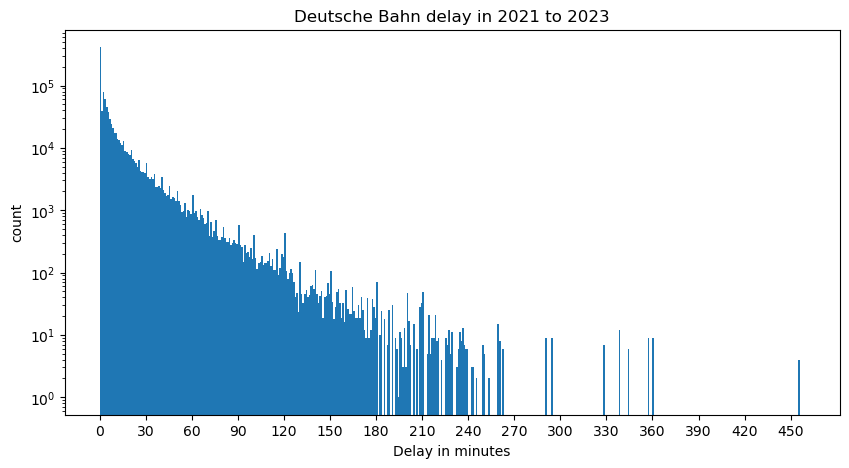

In [85]:
# fixed bin size
bins = np.arange(0, 460, 1) # fixed bin size

#plt.xlim([min(data)-5, max(data)+5])

plt.figure(figsize=(10,5))
plt.hist(data.delay, bins=bins, alpha=1)
plt.xticks(np.arange(0, 480, step=30))
plt.yscale("log") 
plt.title('Deutsche Bahn delay in 2021 to 2023')
plt.xlabel('Delay in minutes')
plt.ylabel('count')

plt.show()

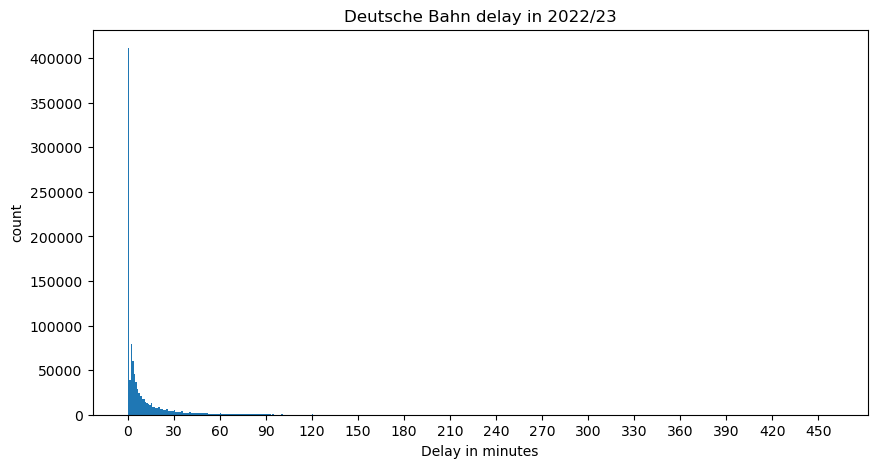

In [84]:
plt.figure(figsize=(10,5))
plt.hist(data.delay, bins=bins, alpha=1)
plt.xticks(np.arange(0, 480, step=30))
#plt.yscale("log") 
plt.title('Deutsche Bahn delay in 2022/23')
plt.xlabel('Delay in minutes')
plt.ylabel('count')

plt.show()

In [ ]:
trains = list(dict.fromkeys(data.train)) # list containing all train numbers 

In [ ]:
list(dict.fromkeys(data[data['train'] == 'ICE 2527'].date))

In [ ]:
data[data['train'] == 'ICE 2527']

### See how many days one train number occurs

In [86]:
occurrences = []
for train in trains:
    ndays = len(list(dict.fromkeys(data[data['train'] == train].date)))
    occurrences.append(ndays)

NameError: name 'trains' is not defined

In [ ]:
plt.plot(occurrences)

In [ ]:
# fixed bin size
bins = np.arange(1, 365, 1) # fixed bin size

plt.figure(figsize=(10,5))
plt.hist(occurrences, bins=bins, alpha=1)
#plt.xticks(np.arange(0, 480, step=30))
plt.yscale("log") 
plt.title('Occurences of each train')
plt.xlabel('')
plt.ylabel('count')

plt.show()

## Trainstations Germany
https://download-data.deutschebahn.com/static/datasets/haltestellen/D_Bahnhof_2020_alle.CSV

In [ ]:
stations = pd.read_csv("D_Bahnhof_2020_alle.CSV.csv", sep=';')
stations

In [ ]:
dict.fromkeys(stations.Verkehr)

In [ ]:
stations_db = list(dict.fromkeys(stations.NAME))

In [ ]:
stations_data = list(dict.fromkeys(data.destination))
len(stations_data)

In [ ]:
len(list(set(stations_data).intersection(stations_db))) # some of data stations are missing in Deutsche Bahn Dataset from 113

In [ ]:
#what is in data stations that is not contained in db stations data
notContainedStations = set(stations_data).difference(stations_db)
notContainedStations

### PLOT VERSPÄTUNG FÜR JEDEN EINZELNEN ZUG
Linien Diagramm, y: Verspätung in Minuten \
x: Halt 1-x \
linien sind alle Einzelnen Züge mit alpha klein